In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

iota2005_mars_dataset_path = kagglehub.dataset_download('iota2005/mars-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-05-02-01-01-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-06-01-02-02-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-03-02-01-02-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-03-01-02-02-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-01-01-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-01-01-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-02-02-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-04-01-01-01-02.wav
/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-02-02-02.wav
/kaggle/input/mars-dataset/audio/New folder (2

In [ ]:
import os
import pandas as pd

In [ ]:
data_dir = "/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Song_Actors_01-24"

# Label mappings for clarity
emotion_dict = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
modality_dict = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
channel_dict = {'01': 'speech', '02': 'song'}
intensity_dict = {'01': 'normal', '02': 'strong'}
statement_dict = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
gender_dict = lambda x: 'male' if int(x) % 2 else 'female'

# List to hold extracted data
data = []

# Walk through the directory and parse filenames
for actor_folder in os.listdir(data_dir):
    actor_path = os.path.join(data_dir, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    for filename in os.listdir(actor_path):
        if filename.endswith('.wav'):
            parts = filename.split('.')[0].split('-')
            actor_id_str = parts[6]
            try:
                actor_id_int = int(actor_id_str)
                gender = gender_dict(actor_id_int)
            except ValueError:
                gender = 'unknown' # Or handle the error differently
                print(f"Could not parse actor_id for file: {filename}. Actor ID string: {actor_id_str}")

            data.append({
                'path': os.path.join(data_dir,actor_path, filename),
                'filename': filename,
                'modality': modality_dict[parts[0]],
                'vocal_channel': channel_dict[parts[1]],
                'emotion': emotion_dict[parts[2]],
                'intensity': intensity_dict.get(parts[3], 'normal'),
                'statement': statement_dict[parts[4]],
                'repeat': parts[5],
                'actor_id': actor_id_str,
                'gender': gender,
                'actor_folder': actor_folder
            })

# Create the DataFrame
df1 = pd.DataFrame(data)

In [ ]:
data_dir = "/kaggle/input/mars-dataset/audio/New folder (2)/Audio_Speech_Actors_01-24"

# Label mappings for clarity
emotion_dict = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
modality_dict = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
channel_dict = {'01': 'speech', '02': 'song'}
intensity_dict = {'01': 'normal', '02': 'strong'}
statement_dict = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
gender_dict = lambda x: 'male' if int(x) % 2 else 'female'

# List to hold extracted data
data = []

# Walk through the directory and parse filenames
for actor_folder in os.listdir(data_dir):
    actor_path = os.path.join(data_dir, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    for filename in os.listdir(actor_path):
        if filename.endswith('.wav'):
            parts = filename.split('.')[0].split('-')
            actor_id_str = parts[6]
            try:
                actor_id_int = int(actor_id_str)
                gender = gender_dict(actor_id_int)
            except ValueError:
                gender = 'unknown' # Or handle the error differently
                print(f"Could not parse actor_id for file: {filename}. Actor ID string: {actor_id_str}")

            data.append({
                'path': os.path.join(data_dir,actor_path, filename),
                'filename': filename,
                'modality': modality_dict[parts[0]],
                'vocal_channel': channel_dict[parts[1]],
                'emotion': emotion_dict[parts[2]],
                'intensity': intensity_dict.get(parts[3], 'normal'),
                'statement': statement_dict[parts[4]],
                'repeat': parts[5],
                'actor_id': actor_id_str,
                'gender': gender,
                'actor_folder': actor_folder
            })

# Create the DataFrame
df2 = pd.DataFrame(data)

In [ ]:
df1.sample(5)

,path,filename,modality,vocal_channel,emotion,intensity,statement,repeat,actor_id,gender,actor_folder
1003,/kaggle/input/mars-dataset/audio/New folder (2...,03-02-03-02-01-02-07.wav,audio-only,song,happy,strong,Kids are talking by the door,02,07,male,Actor_07
793,/kaggle/input/mars-dataset/audio/New folder (2...,03-02-04-02-02-01-09.wav,audio-only,song,sad,strong,Dogs are sitting by the door,01,09,male,Actor_09
160,/kaggle/input/mars-dataset/audio/New folder (2...,03-02-06-02-01-02-16.wav,audio-only,song,fearful,strong,Kids are talking by the door,02,16,female,Actor_16
18,/kaggle/input/mars-dataset/audio/New folder (2...,03-02-06-01-01-02-02.wav,audio-only,song,fearful,normal,Kids are talking by the door,02,02,female,Actor_02
572,/kaggle/input/mars-dataset/audio/New folder (2...,03-02-01-01-02-02-24.wav,audio-only,song,neutral,normal,Dogs are sitting by the door,02,24,female,Actor_24


In [ ]:
df = pd.concat([df1, df2])

# Shuffle the concatenated dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.drop(['actor_id','actor_folder','filename','modality','vocal_channel','intensity','repeat'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,path,emotion,statement,gender
1886,/kaggle/input/mars-dataset/audio/New folder (2...,calm,Kids are talking by the door,female
1251,/kaggle/input/mars-dataset/audio/New folder (2...,fearful,Kids are talking by the door,male
190,/kaggle/input/mars-dataset/audio/New folder (2...,disgust,Kids are talking by the door,male
135,/kaggle/input/mars-dataset/audio/New folder (2...,calm,Kids are talking by the door,male
917,/kaggle/input/mars-dataset/audio/New folder (2...,fearful,Dogs are sitting by the door,male


In [ ]:
df.drop(['statement','gender'],axis=1,inplace=True)

In [ ]:
df.head()

,path,emotion
0,/kaggle/input/mars-dataset/audio/New folder (2...,happy
1,/kaggle/input/mars-dataset/audio/New folder (2...,sad
2,/kaggle/input/mars-dataset/audio/New folder (2...,calm
3,/kaggle/input/mars-dataset/audio/New folder (2...,calm
4,/kaggle/input/mars-dataset/audio/New folder (2...,angry


In [ ]:
import seaborn as sns
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, TimeDistributed, Conv1D,Conv2D, MaxPooling2D,MaxPooling1D,
                                     BatchNormalization, Dropout, Flatten, LSTM, Dense)
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2025-06-24 09:21:42.293630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750756902.854980      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750756903.001158      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<Axes: xlabel='emotion', ylabel='count'>

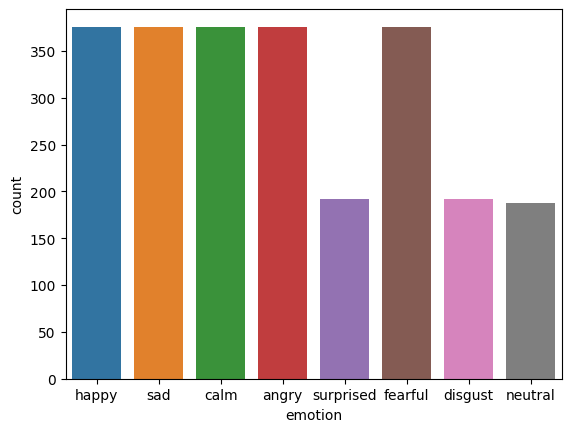

In [ ]:
sns.countplot(df,x='emotion')

In [ ]:
df.head()

,path,emotion
0,/kaggle/input/mars-dataset/audio/New folder (2...,happy
1,/kaggle/input/mars-dataset/audio/New folder (2...,sad
2,/kaggle/input/mars-dataset/audio/New folder (2...,calm
3,/kaggle/input/mars-dataset/audio/New folder (2...,calm
4,/kaggle/input/mars-dataset/audio/New folder (2...,angry


## Augmentation+MFCC

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Shapes:
 X_train: (7844, 40, 1) y_train: (7844, 8)
   X_val: (491, 40, 1)   y_val: (491, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750757166.869903      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750757166.870710      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 40, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 373,256 (1.42 MB)

 Trainable params: 372,360 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50


I0000 00:00:1750757173.132365     112 service.cc:148] XLA service 0x45c0d840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750757173.133846     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750757173.133883     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750757173.682898     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


 53/246 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1554 - loss: 2.9226

I0000 00:00:1750757179.063772     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.2135 - loss: 2.5316 - val_accuracy: 0.4277 - val_loss: 1.5924
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3453 - loss: 1.7751 - val_accuracy: 0.4460 - val_loss: 1.4520
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4032 - loss: 1.5795 - val_accuracy: 0.4827 - val_loss: 1.3528
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4445 - loss: 1.4659 - val_accuracy: 0.5418 - val_loss: 1.2250
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4751 - loss: 1.3975 - val_accuracy: 0.5193 - val_loss: 1.2031
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4968 - loss: 1.3314 - val_accuracy: 0.5580 - val_loss: 1.1345
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5302 - loss: 1.2574 - val_accuracy: 0.5356 - val_loss: 1.1485
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5262 - loss: 1.2607 - val_accuracy: 0.5845 - va

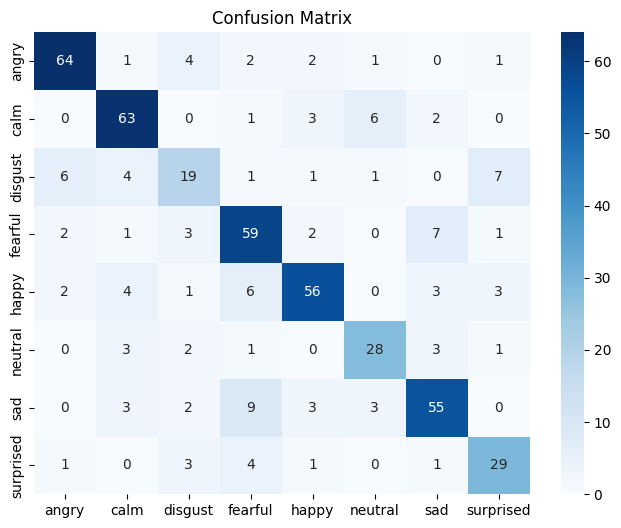


Classification Report:
              precision    recall  f1-score   support

       angry       0.85      0.85      0.85        75
        calm       0.80      0.84      0.82        75
     disgust       0.56      0.49      0.52        39
     fearful       0.71      0.79      0.75        75
       happy       0.82      0.75      0.78        75
     neutral       0.72      0.74      0.73        38
         sad       0.77      0.73      0.75        75
   surprised       0.69      0.74      0.72        39

    accuracy                           0.76       491
   macro avg       0.74      0.74      0.74       491
weighted avg       0.76      0.76      0.76       491



In [ ]:
SR       = 16000   # sampling rate
N_MFCC   = 40      # number of MFCCs
TEST_SZ  = 0.20    # 20% test split
RND_SEED = 42

def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise

def shift_pitch(data, sr, n_steps=2):
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)

def time_stretch(data, rate=1.1):
    return librosa.effects.time_stretch(y=data, rate=rate)


def extract_mfcc_mean(y, sr, n_mfcc=N_MFCC):
    """Compute MFCC and return mean over time → shape (n_mfcc,)"""
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)


def prepare_dataset(df, augment=False):
    """
    df must have columns ['path','emotion_label'].
    If augment=True, applies 1x noise, pitch, stretch PER AUDIO.
    Returns (X, y) as numpy arrays.
    """
    X, y = [], []
    for _, row in df.iterrows():
        path  = row['path']
        label = row['emotion_label']
        try:
            signal, sr = librosa.load(path, sr=SR)
        except Exception as e:
            print(f"⚠️ Could not load {path}: {e}")
            continue

        # --- original features
        feat = extract_mfcc_mean(signal, sr)
        X.append(feat); y.append(label)

        # --- augmentations (only if flag set)
        if augment:
            # noise
            x1 = add_noise(signal)
            X.append(extract_mfcc_mean(x1, sr)); y.append(label)

            # pitch up
            x2 = shift_pitch(signal, sr, n_steps=2)
            X.append(extract_mfcc_mean(x2, sr)); y.append(label)

            # time stretch
            x3 = time_stretch(signal, rate=1.1)
            X.append(extract_mfcc_mean(x3, sr)); y.append(label)

    return np.vstack(X), np.array(y)



le = LabelEncoder()
df['emotion_label'] = le.fit_transform(df['emotion'])

train_df, val_df = train_test_split(
    df, test_size=TEST_SZ, random_state=RND_SEED, stratify=df['emotion_label']
)

# prepare features
X_train, y_train = prepare_dataset(train_df, augment=True)
X_val,   y_val   = prepare_dataset(val_df,   augment=False)

# expand dims for Conv1D: (samples, timesteps=N_MFCC, channels=1)
X_train = X_train.reshape(-1, N_MFCC, 1)
X_val   = X_val.reshape(-1,   N_MFCC, 1)

# one-hot encode targets
num_classes   = len(le.classes_)
y_train_oh    = to_categorical(y_train, num_classes)
y_val_oh      = to_categorical(y_val,   num_classes)

print("Shapes:")
print(" X_train:", X_train.shape, "y_train:", y_train_oh.shape)
print("   X_val:",   X_val.shape,   "  y_val:",   y_val_oh.shape)


model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu',
           input_shape=(N_MFCC,1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)]
)

val_loss, val_acc = model.evaluate(X_val, y_val_oh, verbose=0)
print(f"\nValidation Loss: {val_loss:.4f}  —  Validation Accuracy: {val_acc:.4f}")

y_pred = np.argmax(model.predict(X_val), axis=1)
cm     = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap='Blues')
plt.title("Confusion Matrix"); plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=le.classes_))


## MFCC+dMFCC+ddMFCC+Augmentation

In [ ]:
SR = 16000                # Sampling rate
TARGET_DURATION = 5       # in seconds
MAX_LEN = SR * TARGET_DURATION  # 80000 samples

def pad_or_crop(signal, sr=SR, target_duration=TARGET_DURATION):
    max_len = sr * target_duration
    if len(signal) < max_len:
        return np.pad(signal, (0, max_len - len(signal)))
    else:
        return signal[:max_len]


In [ ]:
def extract_mfcc_full(y, sr, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    return np.stack([mfcc.T, mfcc_delta.T, mfcc_delta2.T], axis=-1)  # (T, n_mfcc, 3)


In [ ]:
def prepare_dataset(df, sr=SR, n_mfcc=40, augment=False):
    X, y = [], []
    for _, row in df.iterrows():
        path = row['path']
        label = row['emotion_label']
        try:
            signal, sr = librosa.load(path, sr=sr)
            signal = pad_or_crop(signal, sr)

            # Original
            X.append(extract_mfcc_full(signal, sr, n_mfcc))
            y.append(label)

            if augment:
                # 1. Add noise
                noisy = add_noise(signal)
                X.append(extract_mfcc_full(pad_or_crop(noisy, sr), sr, n_mfcc))
                y.append(label)

                # 2. Pitch up
                pitch_up = shift_pitch(signal, sr, n_steps=2)
                X.append(extract_mfcc_full(pad_or_crop(pitch_up, sr), sr, n_mfcc))
                y.append(label)

                # 3. Pitch down
                pitch_down = shift_pitch(signal, sr, n_steps=-2)
                X.append(extract_mfcc_full(pad_or_crop(pitch_down, sr), sr, n_mfcc))
                y.append(label)

                # 4. Time stretch (faster)
                stretch_fast = time_stretch(signal, rate=1.2)
                X.append(extract_mfcc_full(pad_or_crop(stretch_fast, sr), sr, n_mfcc))
                y.append(label)

                # 5. Time stretch (slower)
                stretch_slow = time_stretch(signal, rate=0.8)
                X.append(extract_mfcc_full(pad_or_crop(stretch_slow, sr), sr, n_mfcc))
                y.append(label)

        except Exception as e:
            print(f"⚠️ Error loading {path}: {e}")
            continue

    return np.array(X), np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label encode
le = LabelEncoder()
df['emotion_label'] = le.fit_transform(df['emotion'])

# Split
train_df, val_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['emotion_label']
)

# Prepare features
X_train, y_train = prepare_dataset(train_df, augment=True)
X_val,   y_val   = prepare_dataset(val_df, augment=False)

# One-hot encode labels
num_classes = len(le.classes_)
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh   = to_categorical(y_val, num_classes)

print("X_train:", X_train.shape, "y_train:", y_train_oh.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val_oh.shape)


X_train: (11766, 157, 40, 3) y_train: (11766, 8)
X_val:   (491, 157, 40, 3) y_val:   (491, 8)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam

input_shape = X_train.shape[1:]  # (T, n_mfcc, 3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    SpatialDropout2D(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),  # ✅ regular dropout here

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 157, 40, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 157, 40, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 78, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d (SpatialDropout2D) │ (None, 78, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 78, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 78, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 39, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_1                  │ (None, 39, 10, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 39, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 39, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 5, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_2                  │ (None, 19, 5, 128)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,113,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,210,440 (12.25 MB)

 Trainable params: 3,209,480 (12.24 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_val, y_val_oh),
    epochs=50,
    batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.2778 - loss: 2.2196 - val_accuracy: 0.5234 - val_loss: 1.2550 - learning_rate: 0.0010
Epoch 2/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4703 - loss: 1.4111 - val_accuracy: 0.6619 - val_loss: 0.9380 - learning_rate: 0.0010
Epoch 3/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6008 - loss: 1.0822 - val_accuracy: 0.6456 - val_loss: 0.9396 - learning_rate: 0.0010
Epoch 4/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6712 - loss: 0.8891 - val_accuracy: 0.7067 - val_loss: 0.8690 - learning_rate: 0.0010
Epoch 5/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7127 - loss: 0.7990 - val_accuracy: 0.7536 - val_loss: 0.6956 - learning_rate: 0.0010
Epoch 6/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7351 - loss: 0.7135 - val_accuracy: 0.7862 - val_loss: 0.6351 - learning_rate: 0.0010
Epoch 7/50
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7949 - loss: 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


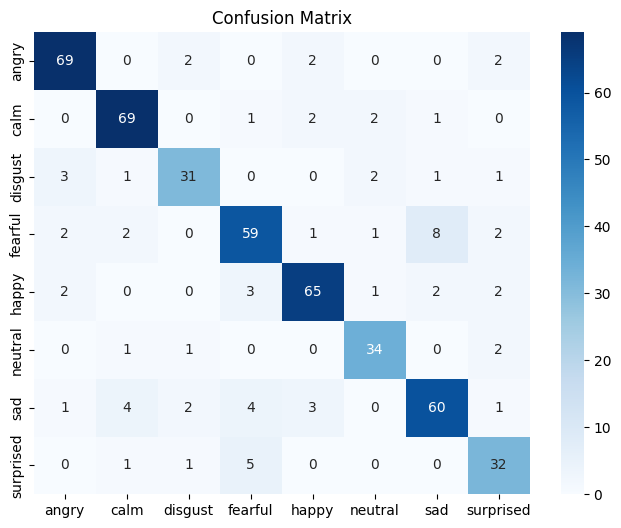

              precision    recall  f1-score   support

       angry       0.90      0.92      0.91        75
        calm       0.88      0.92      0.90        75
     disgust       0.84      0.79      0.82        39
     fearful       0.82      0.79      0.80        75
       happy       0.89      0.87      0.88        75
     neutral       0.85      0.89      0.87        38
         sad       0.83      0.80      0.82        75
   surprised       0.76      0.82      0.79        39

    accuracy                           0.85       491
   macro avg       0.85      0.85      0.85       491
weighted avg       0.85      0.85      0.85       491



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = np.argmax(model.predict(X_val), axis=1)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix"); plt.show()

# Classification report
print(classification_report(y_val, y_pred, target_names=le.classes_))


In [ ]:
model.save("/kaggle/working/emotion_recognition_model(new).h5")


In [ ]:
1